<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/News_nao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recherche d'articles de News via une API
Site https://newsapi.org/
Mise à jour automatique dans l'URL de l'API de la date et du thème choisi : Karaté
création d'un dataframe

In [29]:
import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey={API_KEY}"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
df.to_csv("output.csv")



In [30]:
"""

from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

nwe_date

"""

'\n\nfrom datetime import date, timedelta\ntoday = date.today() # today\nday = timedelta(days=1) # 1 day duration\n\nfor counter in range(30):\n  temp_date = today - counter*day\n  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"\n  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"\n  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")\n\nnwe_date\n\n'

In [31]:
df['url']

0      https://www.netzwelt.de/news/215593-mission-im...
1      https://thehillstimes.in/assam/hsoa-and-mdks-o...
2      https://canaltech.com.br/entretenimento/hbo-ma...
3      https://www.abc.net.au/news/2023-03-23/afghani...
4      https://www.europapress.es/deportes/noticia-da...
                             ...                        
424    https://www.svt.se/nyheter/lokalt/ost/sportlag...
425    https://www.mmamania.com/2023/2/23/23612095/kr...
426    https://www.laut.de/Mehnersmoos/Alben/Sexy-120168
427    https://www.dagospia.com/rubrica-2/media_e_tv/...
428    https://natemat.pl/470909,lasy-panstwowe-dotow...
Name: url, Length: 429, dtype: object

In [32]:
# clean content

for _ , row in df.iterrows():
  row['content'] = " ".join(row['content'].split(" ")[:-3])

df['content'][10]

'SOYAPANGO, El Salvador (AP) With semiautomatic weapons pressed to their chest, a pack of camouflage-clad police officers marches through rows of small brick homes winding up hills on the fringes of'

In [33]:
df.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')

In [34]:
# merge columns with text

df['merge_text'] = df[["content", "title", "description"]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

df

,source,author,title,description,url,urlToImage,publishedAt,content,merge_text
0,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23T08:22:39Z,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio...","ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
1,Thehillstimes.in,The Hills Times,HSOA And MDKS Organise Felicitation Programme.,"HT Correspondent MORIGAON, March 22: Hapkido S...",https://thehillstimes.in/assam/hsoa-and-mdks-o...,https://thehillstimes.in/wp-content/uploads/20...,2023-03-23T01:15:38Z,"HT Correspondent\r\nMORIGAON, March 22: Hapkid...","HT Correspondent\r\nMORIGAON, March 22: Hapkid..."
2,Canaltech.com.br,Diandra Guedes,Lançamentos da HBO Max na semana (22/03/2023),"Na penúltima semana de março, a lista de lança...",https://canaltech.com.br/entretenimento/hbo-ma...,https://t.ctcdn.com.br/3NR8Cn-gMP84rZcVcAMxsIe...,2023-03-22T23:45:00Z,"Na penúltima semana de março, a lista de lança...","Na penúltima semana de março, a lista de lança..."
3,ABC News (AU),Erin Handley,'Sixth grade is nothing': Calls for Taliban to...,It has been 18 months since girls could go to ...,https://www.abc.net.au/news/2023-03-23/afghani...,https://live-production.wcms.abc-cdn.net.au/d4...,2023-03-22T21:05:21Z,"Thirteen-year-old Zala Sherani loves karate, m...","Thirteen-year-old Zala Sherani loves karate, m..."
4,Europapress.es,None,Damián Quintero y Paola García pelearán por el...,Los españoles Damián Quintero y Paola García l...,https://www.europapress.es/deportes/noticia-da...,https://img.europapress.es/fotoweb/fotonoticia...,2023-03-22T19:22:23Z,"MADRID, 22 Mar. (EUROPA PRESS) - \r\n Los espa...","MADRID, 22 Mar. (EUROPA PRESS) - \r\n Los espa..."
...,...,...,...,...,...,...,...,...,...
424,Www.svt.se,SVT Nyheter,Sportläger för unga med funktionsvariation – J...,"Boccia, mattcurling, friidrott och karate var ...",https://www.svt.se/nyheter/lokalt/ost/sportlag...,https://www.svtstatic.se/image/custom/1200/387...,2023-02-23T17:39:45Z,"Det är Kompisföreningen Öst, en del av Fritids...","Det är Kompisföreningen Öst, en del av Fritids..."
425,MMA Mania,SethGeko,Krylov vs. Spann Breakdown,Twitter: @DadHallOfFamer \r\n\r\n\r\nWordpress...,https://www.mmamania.com/2023/2/23/23612095/kr...,https://cdn.vox-cdn.com/uploads/community/sbnu...,2023-02-23T17:38:54Z,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...,Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
426,Laut.de,Yannik Gölz,"""Sexy"" von Mehnersmoos","Es gibt derzeit niemanden, der Vergleichbares ...",https://www.laut.de/Mehnersmoos/Alben/Sexy-120168,https://www.laut.de/Mehnersmoos/Alben/Sexy-120...,2023-02-23T13:55:27Z,"laut.de-Kritik\r\nEs gibt derzeit niemanden, d...","laut.de-Kritik\r\nEs gibt derzeit niemanden, d..."
427,Dagospia.com,None,“SONO QUASI NONNO MA A 60 ANNI SOGNO ANCORA DI...,Estratto dell’intervista di Alberto Dandolo pe...,https://www.dagospia.com/rubrica-2/media_e_tv/...,https://cdn-static.dagospia.com/img/patch/02-2...,2023-02-23T12:21:19Z,Estratto dell’intervista di Alberto Dandolo pe...,Estratto dell’intervista di Alberto Dandolo pe...


In [35]:
df["merge_text"][0]

'ENTERTAINMENT\r\nIn den letzten beiden "Mission: Impossible"-Filmen reist Tom Cruise als Ethan Hunt wieder um die ganze Welt. Ein Rückkehrer aus dem ersten Film bestätigt nun einen Abstecher nach,Mission Impossible: Ethan Hunt reist nach Alaska! Figur aus dem ersten Film kehrt für das große Finale zurück,In den letzten beiden "Mission: Impossible"-Filmen reist Tom Cruise als Ethan Hunt wieder um die ganze Welt. Ein Rückkehrer aus dem ersten Film bestätigt nun einen Abstecher nach Alaska.\nDieser Artikel wurde einsortiert unter \nEntertainment,Serien.'

In [36]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

GoogleTranslator(source='auto', target='english').translate(df["merge_text"][11])


for index , row in tqdm(df.iterrows()):
  row["merge_text"] = GoogleTranslator(source='auto', target='english').translate(df["merge_text"][index])

df["merge_text"]

429it [03:24,  2.10it/s]


0      ENTERTAINMENT\r\nIn the last two "Mission: Imp...
1      HT Correspondent\r\nMORIGAON, March 22: Hapkid...
2      In the penultimate week of March, the list of ...
3      Thirteen-year-old Zala Sherani loves karate, m...
4      MADRID, March 22 (EUROPA PRESS) -\r\n The Span...
                             ...                        
424    It is Kompisföreningen Öst, part of the Fritid...
425    Twitter: @DadHallOfFamer \r\n\n\n\nWordpress: ...
426    loud.de criticism\r\nThere is currently no one...
427    Extract from the interview by Alberto Dandolo ...
428    Do you want to read naTemat.pl without ads and...
Name: merge_text, Length: 429, dtype: object

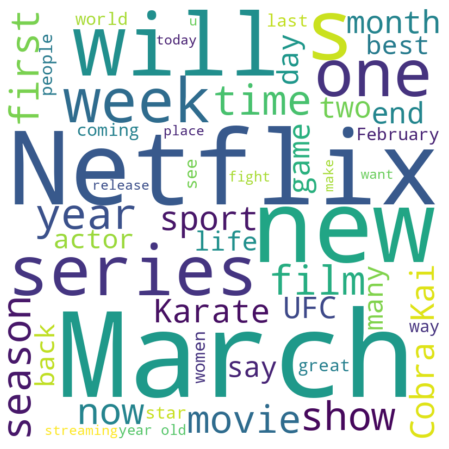

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df["merge_text"])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=STOPWORDS, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
# formater la colonne ‘publishedAt’
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publishedAt'] = df['publishedAt'].dt.strftime('%d/%m/%Y')
df['publishedAt']

0      23/03/2023
1      23/03/2023
2      22/03/2023
3      22/03/2023
4      22/03/2023
          ...    
424    23/02/2023
425    23/02/2023
426    23/02/2023
427    23/02/2023
428    23/02/2023
Name: publishedAt, Length: 429, dtype: object

In [15]:
# import de pandas
import pandas as pd

# chargement de votre dataframe
df = pd.read_csv('output.csv')

# spécification de la colonne dans laquelle rechercher le mot
colonne = 'content'

# spécification du mot à rechercher
mot = 'Netflix'

# utilisation de la méthode str.contains() pour créer un masque de booléens
masque = df[colonne].str.contains(mot)

# comptage des articles correspondants
nombre_articles = masque.sum()

# affichage du résultat
print(f"Il y a {nombre_articles} articles dans le dataframe contenant le mot '{mot}' dans la colonne '{colonne}'.")
nombre_articles

Il y a 50 articles dans le dataframe contenant le mot 'Netflix' dans la colonne 'content'.


50

In [16]:
import pandas as pd

# Filtrer les articles contenant le mot "Netflix"
articles_contenant_mot = df[df['content'].str.contains('Netflix')]

# Convertir la colonne "publishedAt" en objet datetime et extraire la date
df['date'] = pd.to_datetime(df['publishedAt']).dt.date

# Regrouper les articles par date et compter le nombre d'articles par date
articles_par_date = articles_contenant_mot.groupby(df['date']).size().reset_index(name='nb_articles')

# Afficher les résultats
articles_par_date




,date,nb_articles
0,2023-02-23,2
1,2023-02-24,1
2,2023-02-26,2
3,2023-02-27,6
4,2023-02-28,10
5,2023-03-01,8
6,2023-03-02,4
7,2023-03-03,4
8,2023-03-05,3
9,2023-03-06,3


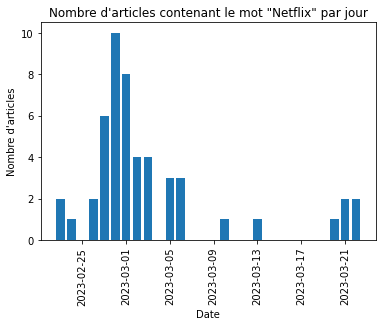

In [17]:
import matplotlib.pyplot as plt

# Tracer un graphique en barres du nombre d'articles par jour
plt.bar(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter un titre et des étiquettes d'axe
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')

# Faire pivoter les étiquettes de l'axe x pour les rendre lisibles
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


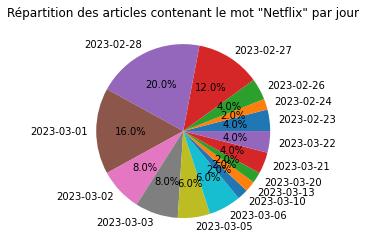

In [18]:
import matplotlib.pyplot as plt

# Tracer un graphique circulaire
plt.pie(articles_par_date['nb_articles'], labels=articles_par_date['date'], autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


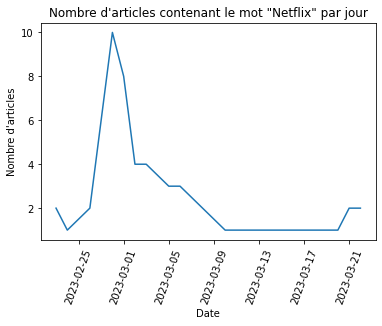

In [19]:
import matplotlib.pyplot as plt

# Tracer un graphique linéaire
plt.plot(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


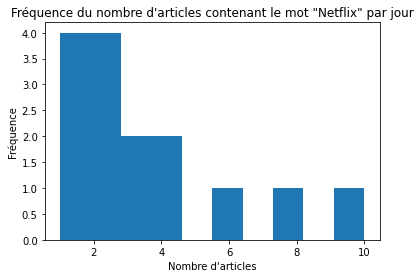

In [20]:
import matplotlib.pyplot as plt

# Tracer un histogramme
plt.hist(articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Nombre d\'articles')
plt.ylabel('Fréquence')
plt.title('Fréquence du nombre d\'articles contenant le mot "Netflix" par jour')

# Afficher le graphique
plt.show()


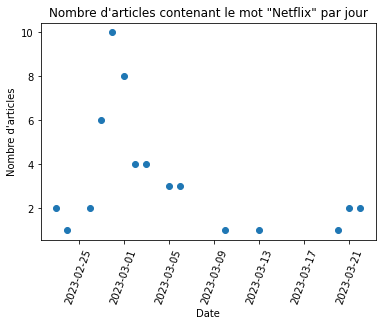

In [21]:
import matplotlib.pyplot as plt

# Tracer un nuage de points
plt.scatter(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


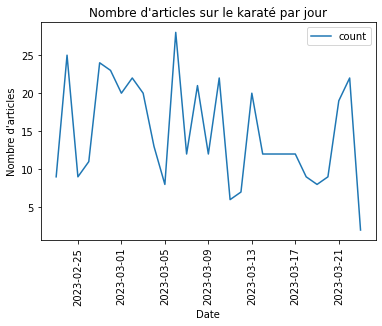

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('output.csv')
df['publishedAt'] = pd.to_datetime(df['publishedAt']).dt.date
articles_per_day = df.groupby('publishedAt').size().reset_index(name='count')
articles_per_day.plot(x='publishedAt', y='count')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur le karaté par jour')
plt.xticks(rotation=90)



plt.show()



In [24]:
# Search for articles about karate movies
df_films = df[df['title'].str.contains('film|cinéma|acteur', case=False)]

# Display results
df_films


,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,netzwelt,Tjark Lorenzen,Mission Impossible: Ethan Hunt reist nach Alas...,"In den letzten beiden ""Mission: Impossible""-Fi...",https://www.netzwelt.de/news/215593-mission-im...,https://img.netzwelt.de/dw1600_dh900_sw3840_sh...,2023-03-23,"ENTERTAINMENT\r\nIn den letzten beiden ""Missio..."
18,18,Sorrisi.com,Stefano Gradi,"Da “The night agent” a “Christian”, i nuovi fi...","Cosa vedere dal 22 al 28 marzo su Netflix, Pri...",https://www.sorrisi.com/tv/da-the-night-agent-...,https://www.sorrisi.com/wp-content/uploads/202...,2023-03-22,"Cosa vedere dal 22 al 28 marzo su Netflix, Pri..."
175,175,Yahoo Entertainment,Local Journalism Initiative,Tiny is a short film about a strong woman,"​Ritchie Hemphill, ’Nakwaxda’xw, is a West Coa...",https://ca.news.yahoo.com/tiny-short-film-stro...,https://s.yimg.com/cv/apiv2/social/images/yaho...,2023-03-09,"Ritchie Hemphill, Nakwaxdaxw, is a West Coast ..."
229,229,Nowymarketing.pl,Nowy Marketing,Jake Gyllenhaal promuje remake filmu „Road Hou...,Gwiazdą gali UFC 285 był aktor Jake Gyllenhaal...,"https://nowymarketing.pl/a/41305,jake-gyllenha...",https://nowymarketing.pl/i/articles/41305_orig...,2023-03-06,Jake Gyllenhaal zaskakuje fanów MMA\r\nNa widz...
280,280,Www.nu.nl,Superguide,Nieuw op Netflix: Deze films en series versche...,Elke week breidt Netflix het aanbod uit met ni...,https://www.nu.nl/film/6253751/nieuw-op-netfli...,https://media.nu.nl/m/fwuxmh6a9vaq_wd1280/nieu...,2023-03-03,Elke week breidt Netflix het aanbod uit met ni...
282,282,Slickdeals.net,Discombobulated,The Karate Kid (1984) (4K UHD Digital Film; MA...,"Amazon \n \nFor those interested \n \nNote, be...",https://slickdeals.net/f/16487029-the-karate-k...,https://static.slickdealscdn.com/attachment/8/...,2023-03-03,"Amazon\r\nFor those interested\r\nNote, be sur..."
304,304,Interia.pl,Radosław Nawrot,Broad Peak to historia na wstrząsający film. C...,"Kiedy w zeszłym roku wszedł na ekrany film ""Br...",https://sport.interia.pl/gory/news-broad-peak-...,https://i.iplsc.com/-/000GTHOWYE6NRU2Q-C429.jpg,2023-03-02,"Film ""Broad Peak"" stanowi pewien przeom. Na te..."
344,344,Leganerd.com,Davide Mirabello,Netflix marzo 2023: tutti i film e le serie TV...,"Ecco tutte le novità di marzo 203 su Netflix, ...",https://leganerd.com/2023/02/28/netflix-marzo-...,https://leganerd.com/wp-content/uploads/2023/0...,2023-02-28,"Ecco tutte le novità di marzo 203 su Netflix, ..."
370,370,Everyeye.it,Mattia Manneschi,"Sky e NOW, da Elvis a Bones and All: ecco i fi...","Il biopic di Elvis, le inquietanti atmosfere d...",https://cinema.everyeye.it/articoli/rubrica-sk...,https://images.everyeye.it/img-articoli/sky-no...,2023-02-27,"Elvis di Baz Luhrmann, il riuscitissimo biopic..."
394,394,Cineblog.it,Pietro Ferraro,Beyond Redemption: trailer e anticipazioni del...,"Tutto quello che c'è da sapere su ""Beyond Rede...",https://www.cineblog.it/post/beyond-redemption...,https://www.blogo.it/app/uploads/sites/3/2023/...,2023-02-25,"E uscito negli Stati Uniti, direttamente in Bl..."


In [25]:
df_grouped = df.groupby('publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-23,9
1,2023-02-24,25
2,2023-02-25,9
3,2023-02-26,11
4,2023-02-27,24
5,2023-02-28,23
6,2023-03-01,20
7,2023-03-02,22
8,2023-03-03,20
9,2023-03-04,13


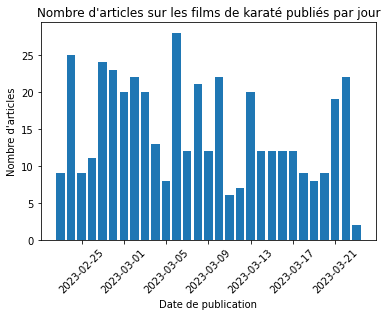

In [26]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Date de publication')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté publiés par jour')
plt.xticks(rotation=45)
plt.show()


In [27]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_grouped = df.resample('W', on='publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-26,54
1,2023-03-05,130
2,2023-03-12,108
3,2023-03-19,85
4,2023-03-26,52


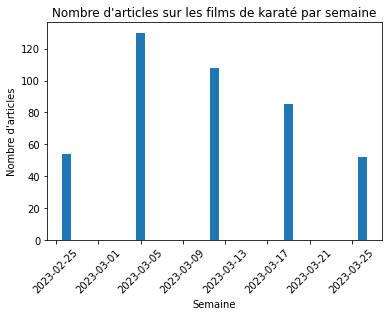

In [28]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Semaine')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté par semaine')
plt.xticks(rotation=45)
plt.show()

